In [5]:
import numpy as np
import matplotlib.pyplot as plt

def corr_scatter_grid(rs=None, n=200, seed=42):
    """
    Draw a grid of scatter plots for given correlation coefficients.
    rs: list/array of correlations; default = [-1.0, -0.9, ..., 1.0]
    n : points per subplot
    """
    if rs is None:
        rs = np.round(np.arange(-1.0, 1.01, 0.1), 2)

    rng = np.random.default_rng(seed)
    cols, rows = 7, 3
    fig, axes = plt.subplots(rows, cols, figsize=(cols*2.2, rows*2.2))

    axes = axes.ravel()
    for ax_idx, (ax, r) in enumerate(zip(axes, rs)):
        # Generate (x, y) with desired Pearson correlation r
        x = rng.standard_normal(n)
        z = rng.standard_normal(n)
        y = r * x + np.sqrt(max(0.0, 1 - r**2)) * z  # works for r=±1

        ax.scatter(x, y, s=16, facecolors='none', edgecolors='C0', linewidths=1)
        ax.set_title(f"{r:+.2f}", fontsize=10, pad=2)

        # Aesthetics similar to the sample image
        ax.set_xlim(-3.5, 3.5)
        ax.set_ylim(-3.5, 3.5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Hide any unused axes (if rs length < rows*cols)
    for ax in axes[len(rs):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

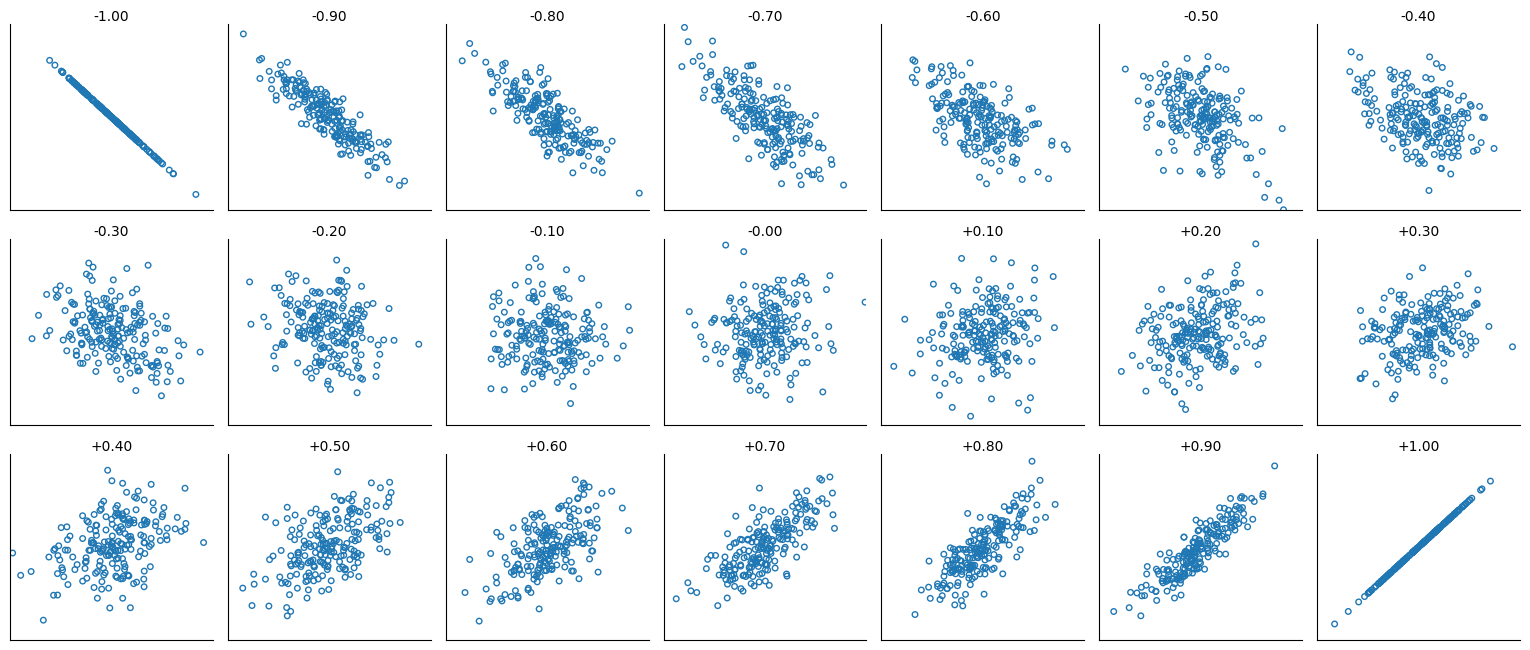

In [6]:
corr_scatter_grid()